In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

torch.manual_seed(123)    # 随机数种子
nobs = 100
x = torch.linspace(-1, 1, nobs)
y = x**2 + 0.2*torch.randn(nobs)
x,y

(tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
         -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
         -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
         -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
         -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
         -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
         -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
          0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
          0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
          0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
          0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
          0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
          0.9394,  0.9596,  

In [6]:
x = x.reshape(nobs,1)
y = y.reshape(nobs,1)
x,y

(tensor([[-1.0000],
         [-0.9798],
         [-0.9596],
         [-0.9394],
         [-0.9192],
         [-0.8990],
         [-0.8788],
         [-0.8586],
         [-0.8384],
         [-0.8182],
         [-0.7980],
         [-0.7778],
         [-0.7576],
         [-0.7374],
         [-0.7172],
         [-0.6970],
         [-0.6768],
         [-0.6566],
         [-0.6364],
         [-0.6162],
         [-0.5960],
         [-0.5758],
         [-0.5556],
         [-0.5354],
         [-0.5152],
         [-0.4949],
         [-0.4747],
         [-0.4545],
         [-0.4343],
         [-0.4141],
         [-0.3939],
         [-0.3737],
         [-0.3535],
         [-0.3333],
         [-0.3131],
         [-0.2929],
         [-0.2727],
         [-0.2525],
         [-0.2323],
         [-0.2121],
         [-0.1919],
         [-0.1717],
         [-0.1515],
         [-0.1313],
         [-0.1111],
         [-0.0909],
         [-0.0707],
         [-0.0505],
         [-0.0303],
         [-0.0101],


In [ ]:
plt.scatter(x.detach().numpy(), y.detach().numpy())
plt.show()

In [8]:
# 定义神经网络，输入层1个神经元，隐藏层10个，输出层1个，激活函数ReLU，默认包含偏置
net = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
print(net) 

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [10]:
# 优化神经网络SGD(net.参数, 学习率=0.2)
# 均方差损失函数处理回归问题
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss() 

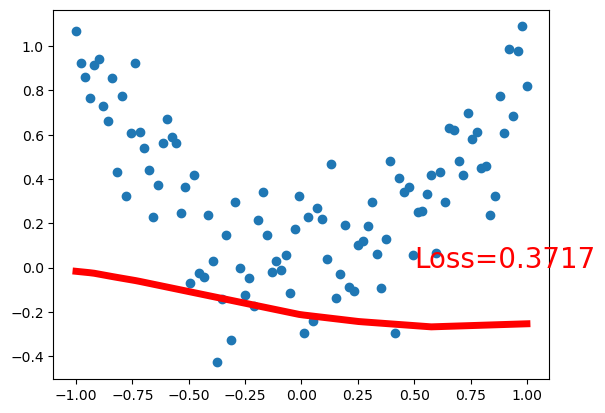

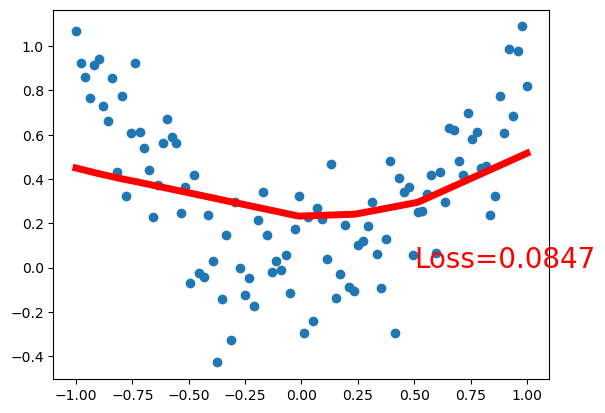

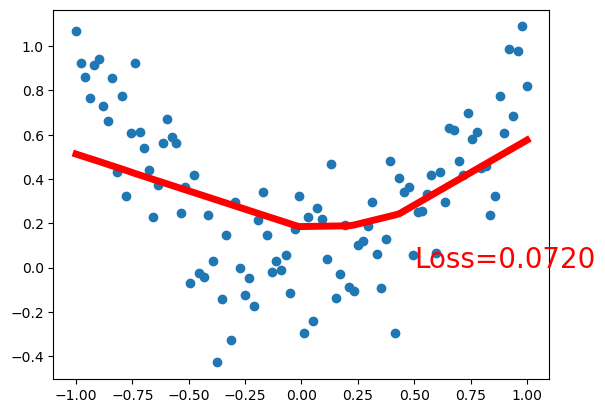

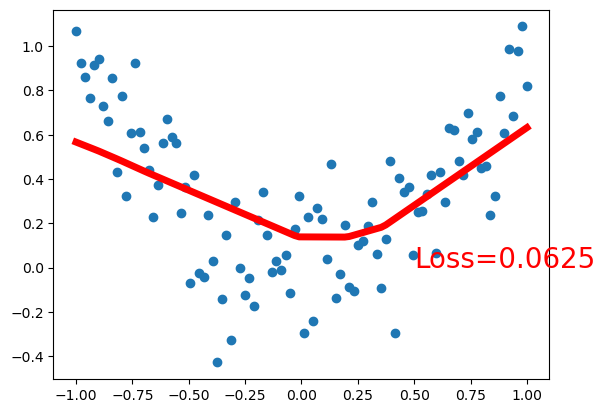

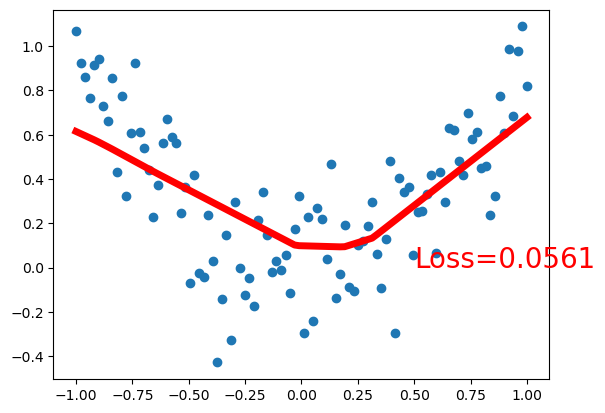

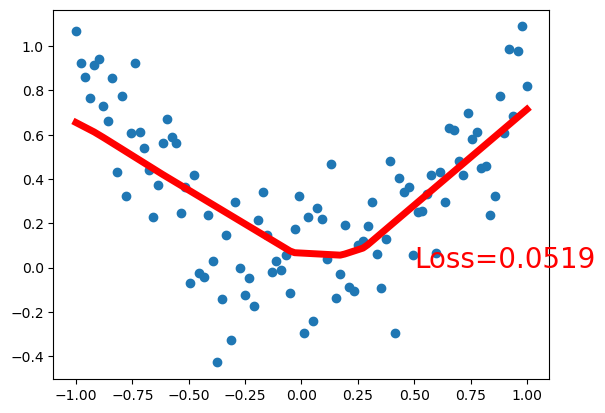

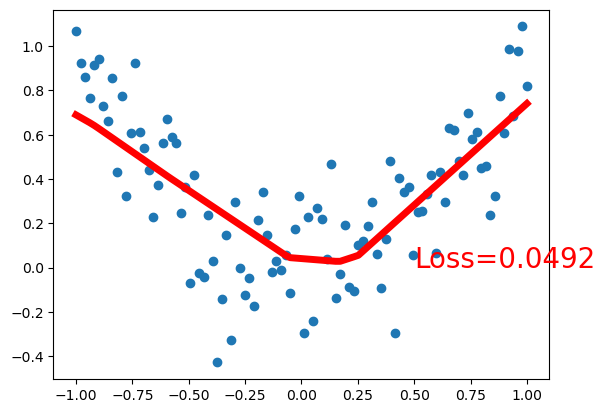

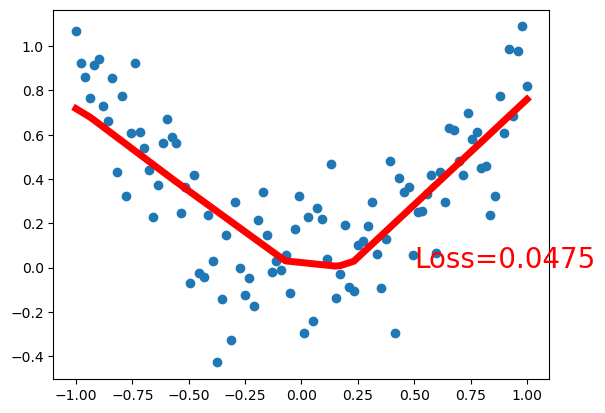

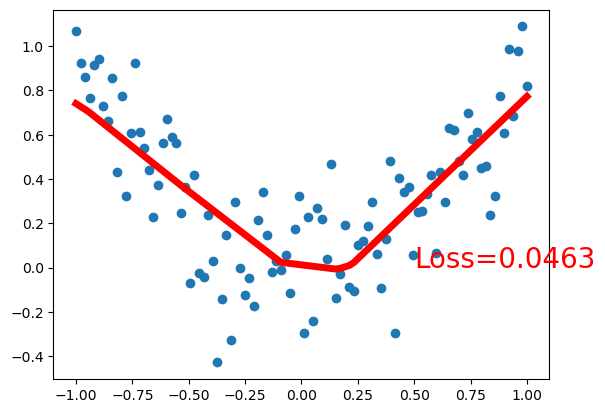

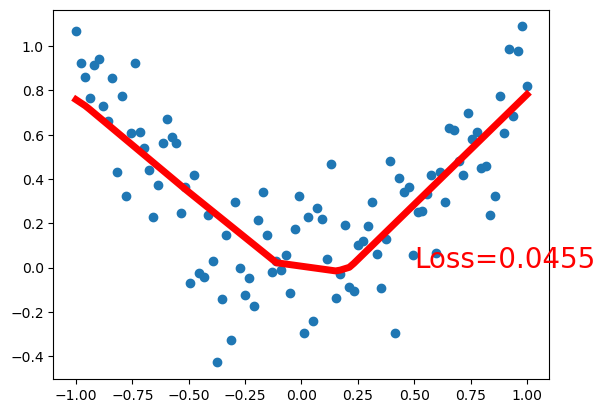

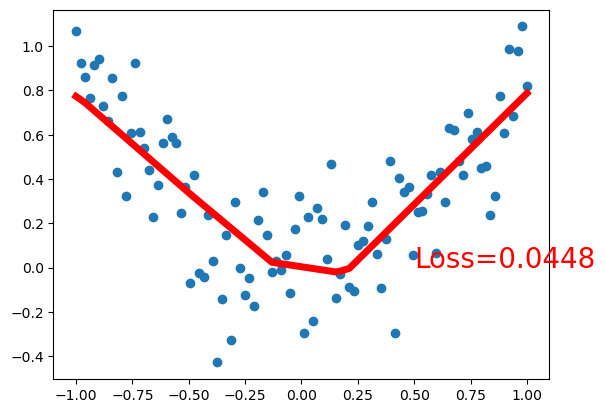

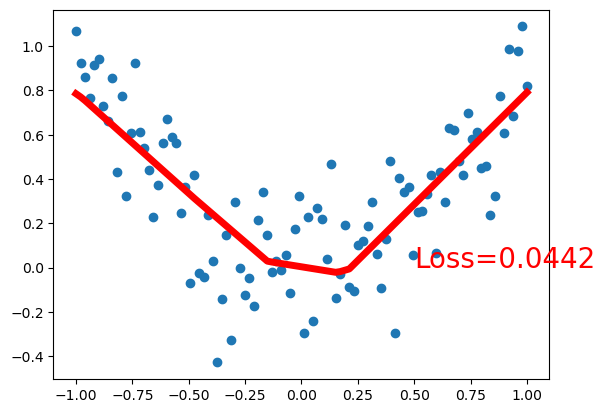

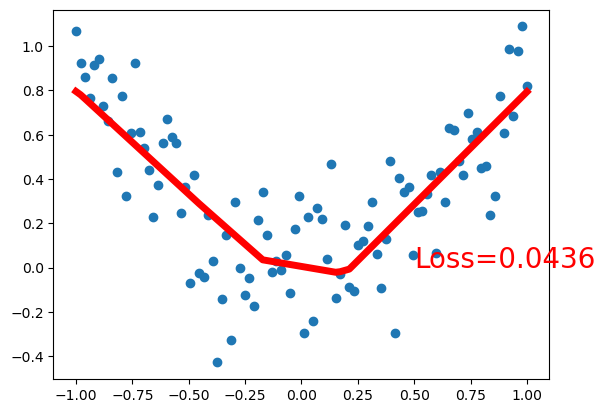

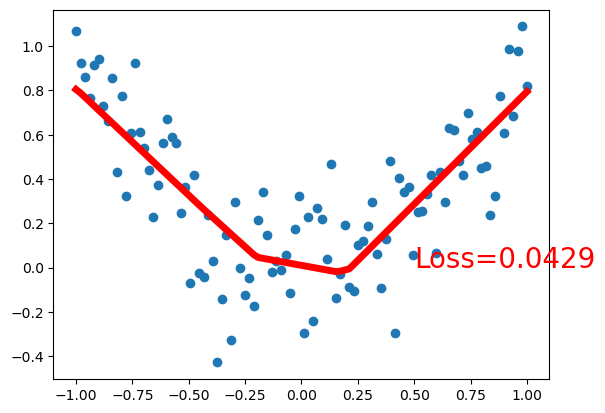

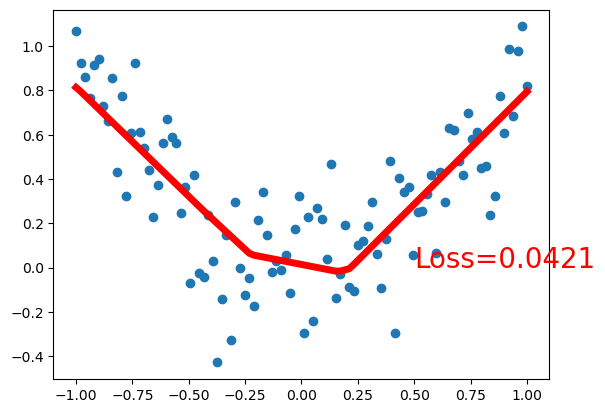

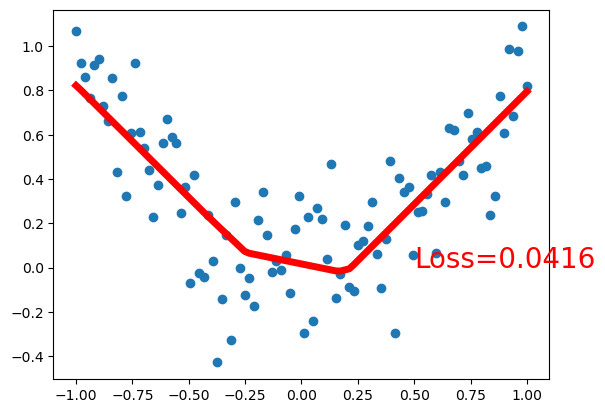

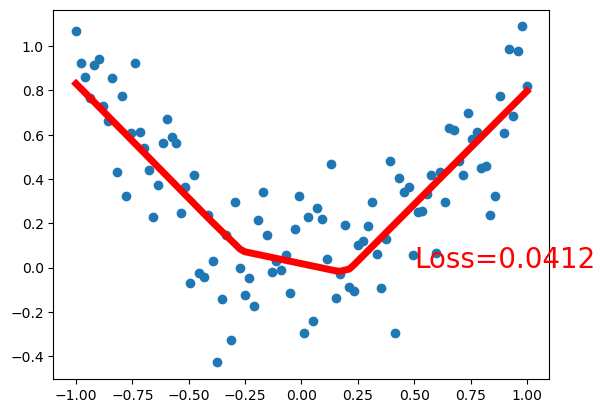

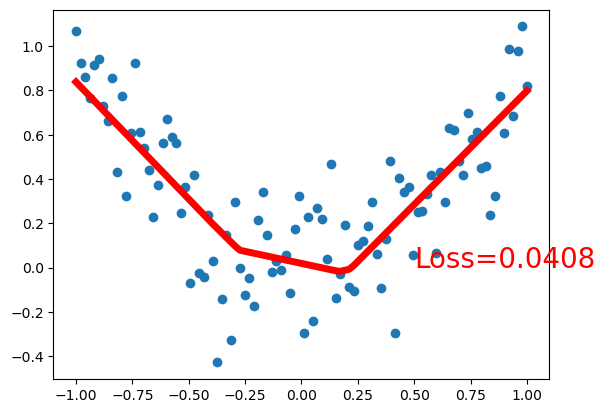

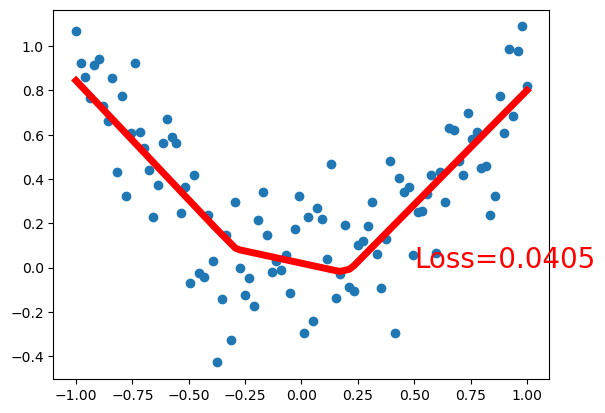

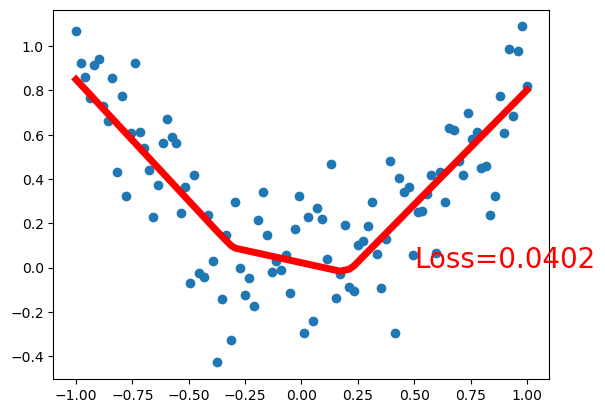

In [7]:
# 训练两百步
for t in range(200):
    prediction = net(x)     # input x and predict based on x    
    loss = loss_func(prediction, y)     #loss_func(预测值, 真实值)

    optimizer.zero_grad()   # 使得梯度为0
    loss.backward()         # 反馈神经网络
    optimizer.step()        # 优化梯度
    #下面是可视化的过程
    if t % 10 == 0:#每十步打印过程
        # plot and show learning process
        plt.cla()
        plt.scatter(x.detach().numpy(), y.detach().numpy())
        plt.plot(x.detach().numpy(), prediction.detach().numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.detach().numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.show()

In [12]:
# 读取csv数据集
import pandas as pd

data = pd.read_csv(r"E:\Teaching\数据挖掘与最优化\Data\iris.csv")
print(data.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [14]:
# 转换为张量格式
data.loc[data["Species"]=="setosa","Species"] = 0
data.loc[data["Species"]=="versicolor","Species"] = 1
data.loc[data["Species"]=="virginica","Species"] = 2
data["Species"] = data["Species"].astype(float)
x = torch.tensor(data[["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]].values).type(torch.FloatTensor)
y = torch.tensor(data["Species"].values).type(torch.LongTensor)

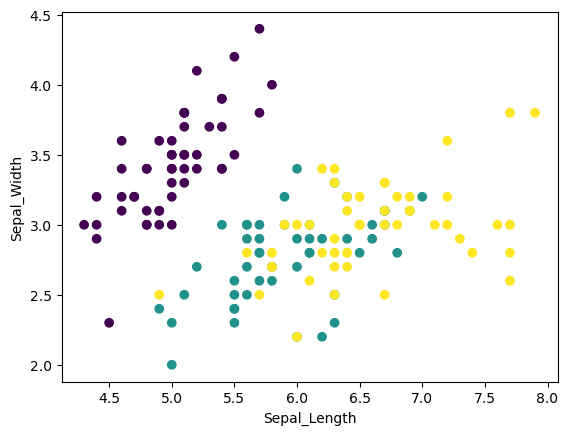

In [239]:
# 绘制散点图
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.show()

In [16]:
# 定义神经网络，输入层4个神经元，隐藏层10个，输出层3个，激活函数ReLU，默认包含偏置
net = torch.nn.Sequential(
    torch.nn.Linear(4, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 3)
)
print(net)
# 参数初始值
print(net.state_dict())

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)
OrderedDict({'0.weight': tensor([[ 0.0382, -0.3709, -0.3758, -0.3254],
        [-0.1698,  0.0370,  0.3443,  0.1937],
        [ 0.3831, -0.3139,  0.0422, -0.4444],
        [ 0.2868,  0.1042,  0.4836, -0.3556],
        [ 0.4010,  0.4221,  0.4043,  0.0713],
        [ 0.4546,  0.3339,  0.3730, -0.0325],
        [-0.3837, -0.0062,  0.0938, -0.3406],
        [-0.2868, -0.4794, -0.1753,  0.4355],
        [ 0.0855, -0.0305,  0.0201,  0.3118],
        [-0.4415, -0.3858, -0.1662, -0.2878]]), '0.bias': tensor([ 0.2579,  0.3533, -0.4851, -0.4243, -0.4869,  0.1886,  0.4024, -0.3877,
        -0.2315,  0.1591]), '2.weight': tensor([[-0.2065,  0.2686,  0.0737, -0.0880,  0.0205,  0.0986, -0.1118, -0.2450,
          0.0021,  0.0058],
        [ 0.0064, -0.0461,  0.2030, -0.0882, -0.0306,  0.1300, -0.1990,  0.0847,
         -0.0699,  0.1517],
        [-0.1715,  0.01

In [18]:
# 优化神经网络SGD(net.参数, 学习率=0.01)
# 交叉熵损失函数处理分类问题
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

C:\Users\Windows10\AppData\Local\Temp\ipykernel_21920\4010950492.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = torch.max(F.softmax(prediction), 1)[1]


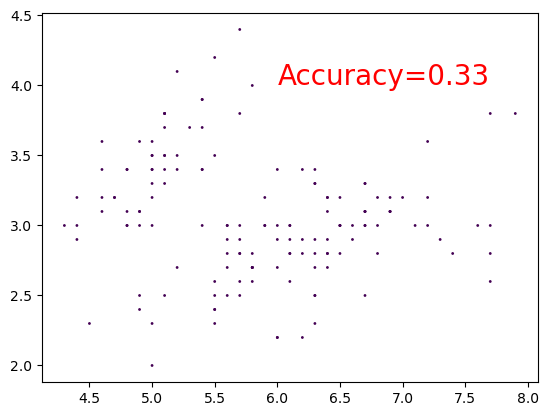

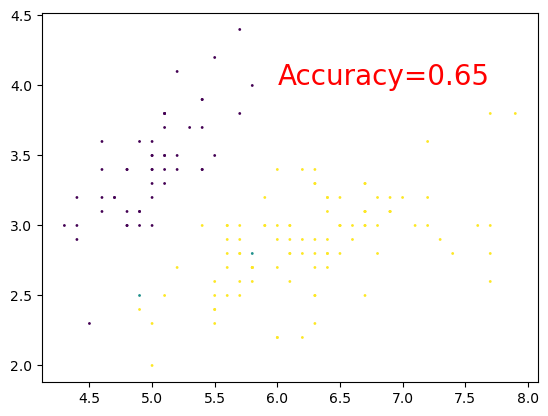

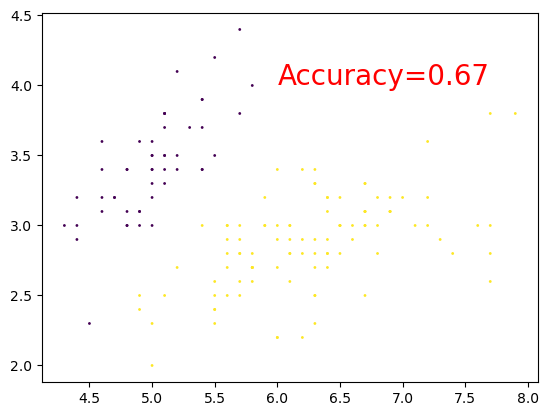

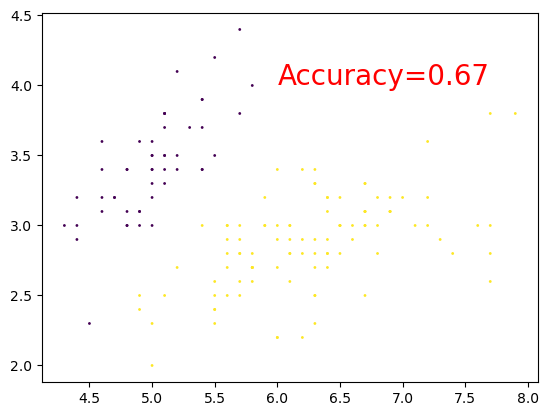

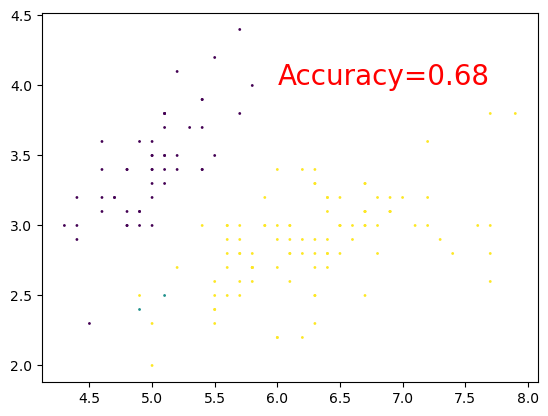

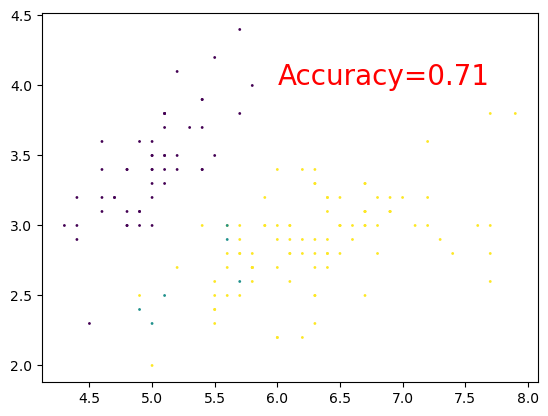

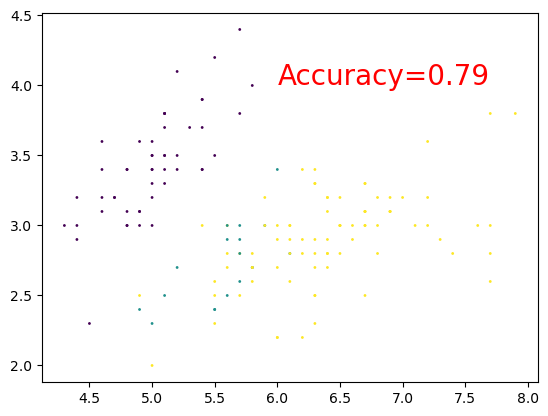

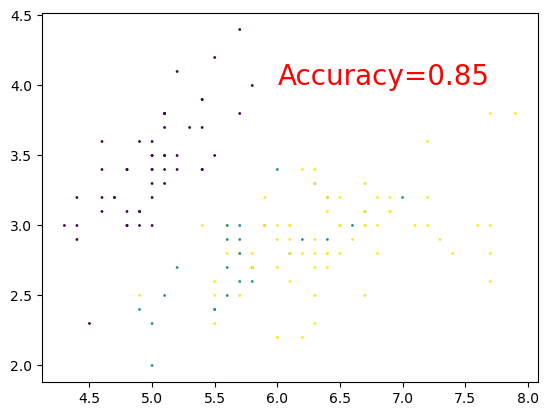

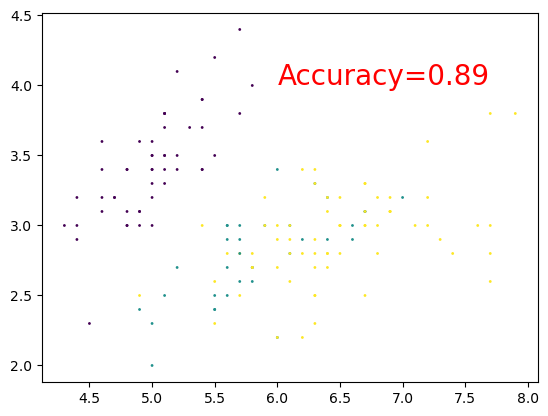

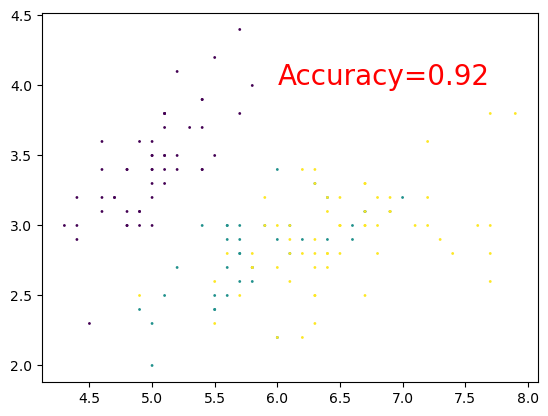

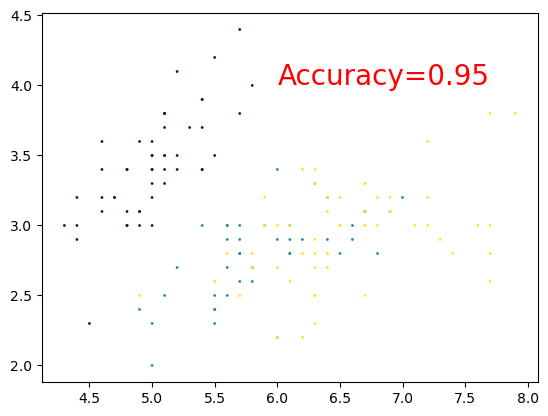

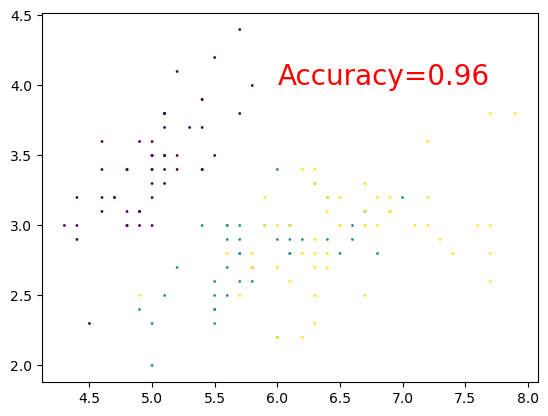

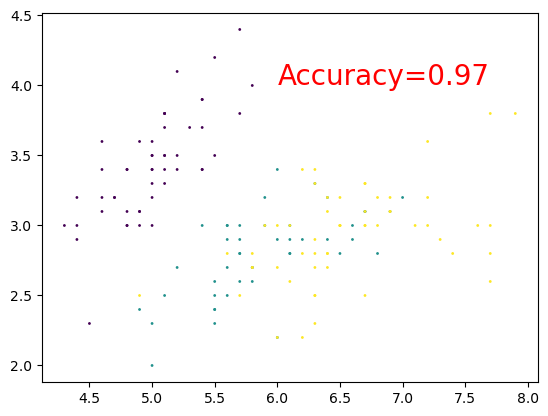

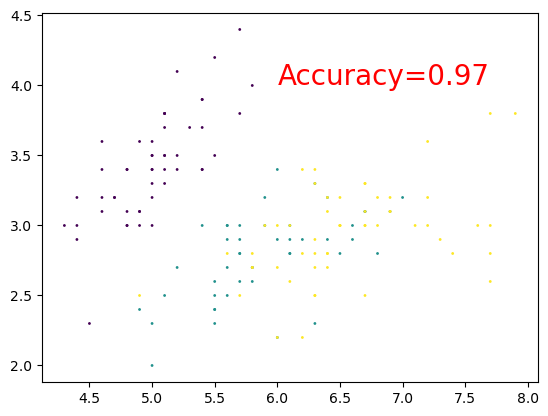

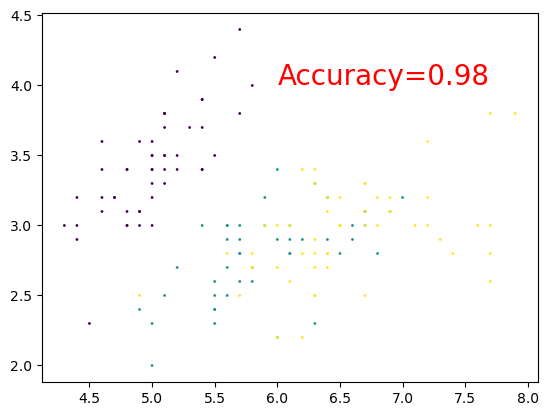

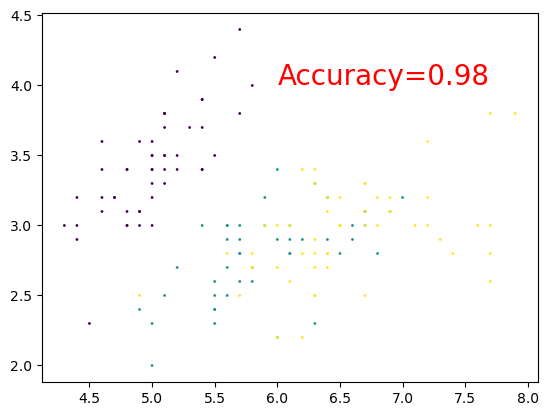

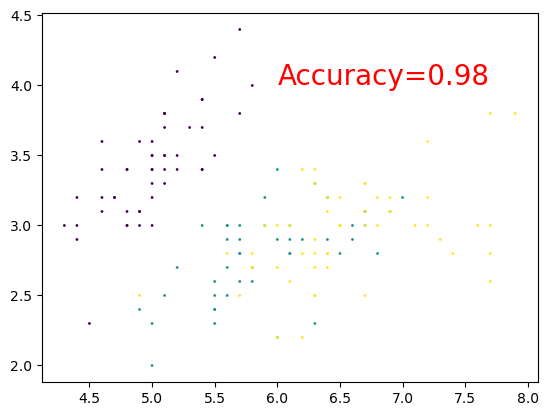

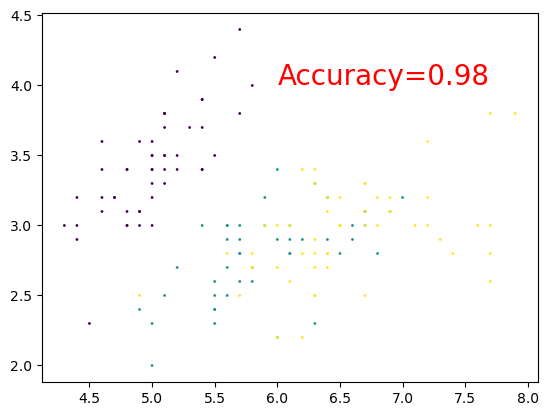

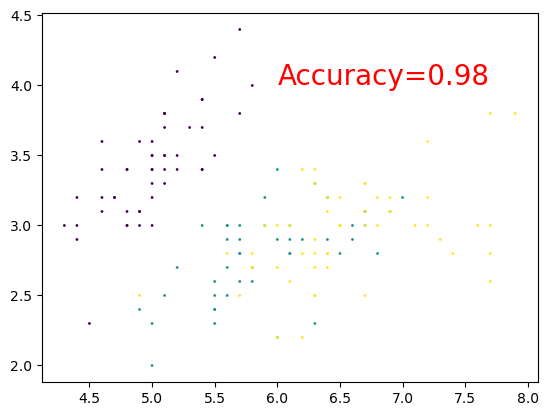

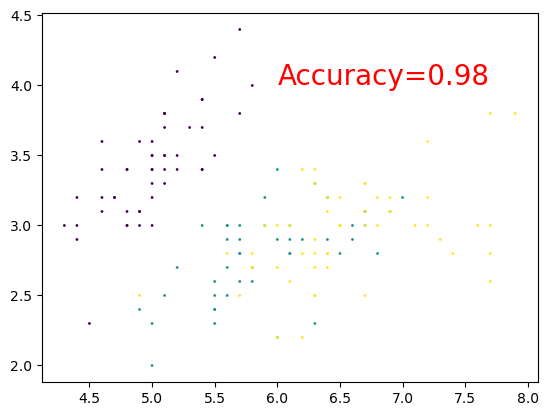

In [232]:
# 训练一千步
for t in range(1000):
    prediction = net(x)     # input x and predict based on x    
    loss = loss_func(prediction, y)     #loss_func(预测值, 真实值)

    optimizer.zero_grad()   # 使得梯度为0
    loss.backward()         # 反馈神经网络
    optimizer.step()        # 优化梯度
    #下面是可视化的过程
    if t % 50 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(prediction), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=1)
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(6,4,'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.show()

In [236]:
# 神经网络的参数
print(net.state_dict())

OrderedDict([('0.weight', tensor([[-0.3230,  0.4764, -0.4761, -0.0298],
        [-0.0238, -0.4559,  0.5614,  0.3455],
        [ 0.6581,  0.8167, -0.5707, -0.6294],
        [ 0.1819,  0.5627,  0.0248, -0.2021],
        [-0.2391,  0.2562, -0.4487, -0.4380],
        [-0.1678, -0.2483, -0.4251,  0.2168],
        [ 0.3963, -0.2124,  0.3488,  0.4823],
        [-0.3216,  0.1697, -0.3649,  0.0577],
        [-0.1065, -0.3653,  1.1157,  0.5572],
        [-0.4399, -0.1818, -0.1502, -0.4830]])), ('0.bias', tensor([ 0.2369, -0.0129, -0.2636,  0.2709, -0.3823,  0.3899, -0.3021,  0.4557,
        -0.0175, -0.3774])), ('2.weight', tensor([[-1.8872e-01, -3.2490e-01,  9.3269e-01,  2.3132e-01,  8.2599e-02,
          1.4960e-01, -1.4581e-01,  2.8363e-01, -1.0670e+00,  3.4395e-04],
        [-2.0016e-01, -9.1032e-02,  1.2737e-01, -2.3572e-02,  2.0314e-01,
         -4.4928e-02,  4.0561e-01, -2.6461e-01, -3.0450e-02,  2.2477e-01],
        [ 1.9887e-01,  6.7702e-01, -8.1586e-01, -5.7555e-01, -1.1553e-01,
      